<a href="https://colab.research.google.com/github/Melisacid/Regresionlineal/blob/main/A_6_1_EEUU_mhc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df= pd.read_csv("data_clean_california_eua.csv")
df.head()

,Unnamed: 0,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,0,958.0,2.020000e+13,1169,1.0,1.0,37.77028,-122.43317,3.0,1.0,...,Entire home/apt,1 bath,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",202.0,t,06/03/2023,23/07/2009,19/02/2023,City Registration Pending,f
1,1,5858.0,2.020000e+13,8904,2.0,2.0,37.74474,-122.42089,4.0,2.0,...,Entire home/apt,1 bath,"[""Essentials"", ""Carbon monoxide alarm"", ""Hange...",235.0,t,06/03/2023,03/05/2009,06/08/2017,City Registration Pending,f
2,2,8142.0,2.020000e+13,21994,13.0,14.0,37.76555,-122.45213,1.0,1.0,...,Private room,4 shared baths,"[""Security cameras on property"", ""Host greets ...",56.0,t,06/03/2023,08/09/2014,27/10/2022,City Registration Pending,f
3,3,8339.0,2.020000e+13,24215,2.0,6.0,37.77564,-122.43642,4.0,2.0,...,Entire home/apt,1.5 baths,"[""Oven"", ""Cooking basics"", ""TV"", ""Smoke alarm""...",575.0,t,06/03/2023,25/09/2009,28/06/2019,STR-0000264,f
4,4,8739.0,2.020000e+13,7149,2.0,2.0,37.76030,-122.42197,3.0,1.0,...,Private room,1 private bath,"[""Paid parking garage off premises"", ""Luggage ...",110.0,t,06/03/2023,01/08/2009,25/02/2023,STR-0000028,f


In [6]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=df.isnull().sum().sum()
valores_nulos

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6936 entries, 0 to 6935
Data columns (total 73 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    6936 non-null   int64  
 1   id                                            6936 non-null   float64
 2   scrape_id                                     6936 non-null   float64
 3   host_id                                       6936 non-null   int64  
 4   host_listings_count                           6936 non-null   float64
 5   host_total_listings_count                     6936 non-null   float64
 6   latitude                                      6936 non-null   float64
 7   longitude                                     6936 non-null   float64
 8   accommodates                                  6936 non-null   float64
 9   bedrooms                                      6936 non-null   f

 Analizar la correlación que existe en cada tipo de habitación (Elegir 2 tipos) respecto a las variables siguientes en el siguiente orden “(dependiente, independiente)”, utilizando Python y Google Colab, obtener los datos y gráficos requeridos en cada caso.

# **Habitación: private room**


## “host_acceptance_rate vs host_response_rate”

In [8]:
# Filtrar los datos para obtener solo los tipos de habitación "Entire home/apt" y "Hotel room"
private_room = df[df['room_type'] == 'Private room']

In [ ]:
#Cambiar datos
private_room['host_response_rate'] = private_room['host_response_rate'].astype(str)  
private_room['host_response_rate'] = private_room['host_response_rate'].str.replace('%', '')  
private_room['host_response_rate'] = pd.to_numeric(private_room['host_response_rate'], errors='coerce')

<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

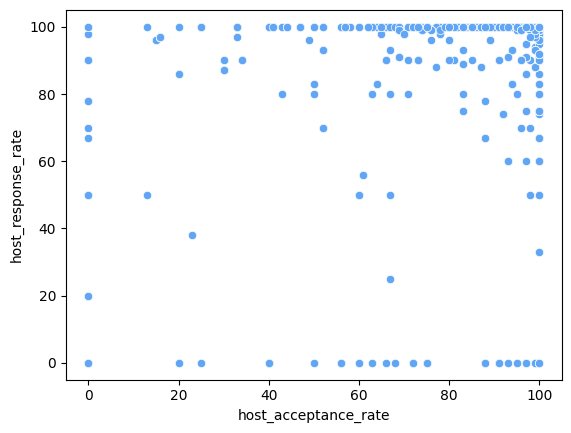

In [10]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='host_acceptance_rate', y='host_response_rate',color="#60A6F5",data=private_room)

In [11]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= private_room[['host_acceptance_rate']]
Var_Dep= private_room['host_response_rate']

In [12]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [13]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [14]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [15]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.15451836]),
 'rank_': 1,
 'singular_': array([988.2429988]),
 'intercept_': 79.58138921033319}

modelo matemático: y= 0.15451836x + 79.58138921033319

In [16]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.0256099334423604

In [17]:
#Predecimos los valores de total 
y_pred= model.predict(X=private_room[['host_acceptance_rate']])
y_pred

array([90.86122983, 93.48804203, 89.93411965, ..., 95.03322568,
       95.03322568, 87.30730745])

In [18]:
#Insertamos la columna de predicciones en el DataFrame
private_room.insert(0, 'Predicciones', y_pred)
private_room.head()

,Predicciones,Unnamed: 0,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
2,90.861230,2,8142.0,2.020000e+13,21994,13.0,14.0,37.76555,-122.45213,1.0,...,Private room,4 shared baths,"[""Security cameras on property"", ""Host greets ...",56.0,t,06/03/2023,08/09/2014,27/10/2022,City Registration Pending,f
4,93.488042,4,8739.0,2.020000e+13,7149,2.0,2.0,37.76030,-122.42197,3.0,...,Private room,1 private bath,"[""Paid parking garage off premises"", ""Luggage ...",110.0,t,06/03/2023,01/08/2009,25/02/2023,STR-0000028,f
6,89.934120,6,490931.0,2.020000e+13,1269188,1.0,3.0,37.74766,-122.42041,2.0,...,Private room,1 bath,"[""Oven"", ""Cooking basics"", ""Blender"", ""Shampoo...",100.0,t,06/03/2023,22/04/2014,26/11/2022,STR-0002192,f
7,95.033226,7,10537.0,2.020000e+13,36752,2.0,3.0,37.71750,-122.39698,2.0,...,Private room,1.5 shared baths,"[""Self check-in"", ""Shared BBQ grill: charcoal""...",95.0,t,06/03/2023,21/02/2010,28/01/2023,2022-011003STR,f
11,95.033226,11,144978.0,2.020000e+13,216682,9.0,9.0,37.79233,-122.42431,1.0,...,Private room,1 bath,"[""Essentials"", ""Bed linens"", ""Carbon monoxide ...",55.0,t,06/03/2023,10/07/2011,28/02/2023,2022-011317STR,f


<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

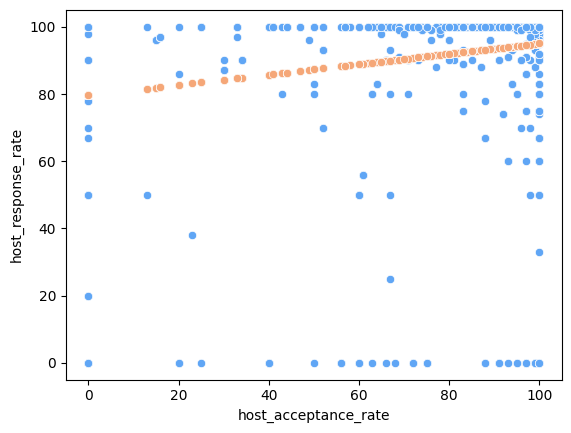

In [19]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='host_acceptance_rate', y='host_response_rate', color="#60A6F5", data=private_room)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones', color="#F5A778", data=private_room)

In [20]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.0256099334423604
Coeficiente de correlación:  0.16003103899669088


## **“host_acceptance_rate vs price”**

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

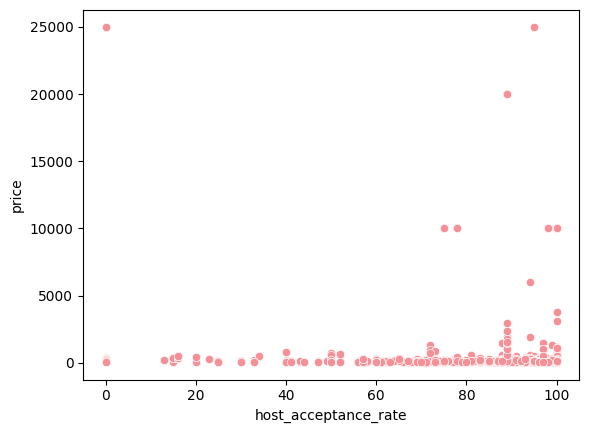

In [21]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='host_acceptance_rate', y='price',color="#F59097",data=private_room)

In [22]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= private_room[['host_acceptance_rate']]
Var_Dep= private_room['price']

In [23]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [24]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [25]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [26]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-4.2419742]),
 'rank_': 1,
 'singular_': array([988.2429988]),
 'intercept_': 810.0679764450924}

modelo matemático: y= 4.2419742x + 810.0679764450924

In [27]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.0018580767213610683

In [28]:
#Predecimos los valores de total 
y_pred= model.predict(X=private_room[['host_acceptance_rate']])
y_pred

array([500.40385952, 428.29029804, 525.85570474, ..., 385.870556  ,
       385.870556  , 597.96926622])

In [29]:
#Insertamos la columna de predicciones en el DataFrame
private_room.insert(0, 'Predicciones2', y_pred)
private_room.head()

,Predicciones2,Predicciones,Unnamed: 0,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
2,500.403860,90.861230,2,8142.0,2.020000e+13,21994,13.0,14.0,37.76555,-122.45213,...,Private room,4 shared baths,"[""Security cameras on property"", ""Host greets ...",56.0,t,06/03/2023,08/09/2014,27/10/2022,City Registration Pending,f
4,428.290298,93.488042,4,8739.0,2.020000e+13,7149,2.0,2.0,37.76030,-122.42197,...,Private room,1 private bath,"[""Paid parking garage off premises"", ""Luggage ...",110.0,t,06/03/2023,01/08/2009,25/02/2023,STR-0000028,f
6,525.855705,89.934120,6,490931.0,2.020000e+13,1269188,1.0,3.0,37.74766,-122.42041,...,Private room,1 bath,"[""Oven"", ""Cooking basics"", ""Blender"", ""Shampoo...",100.0,t,06/03/2023,22/04/2014,26/11/2022,STR-0002192,f
7,385.870556,95.033226,7,10537.0,2.020000e+13,36752,2.0,3.0,37.71750,-122.39698,...,Private room,1.5 shared baths,"[""Self check-in"", ""Shared BBQ grill: charcoal""...",95.0,t,06/03/2023,21/02/2010,28/01/2023,2022-011003STR,f
11,385.870556,95.033226,11,144978.0,2.020000e+13,216682,9.0,9.0,37.79233,-122.42431,...,Private room,1 bath,"[""Essentials"", ""Bed linens"", ""Carbon monoxide ...",55.0,t,06/03/2023,10/07/2011,28/02/2023,2022-011317STR,f


<Axes: xlabel='host_acceptance_rate', ylabel='price'>

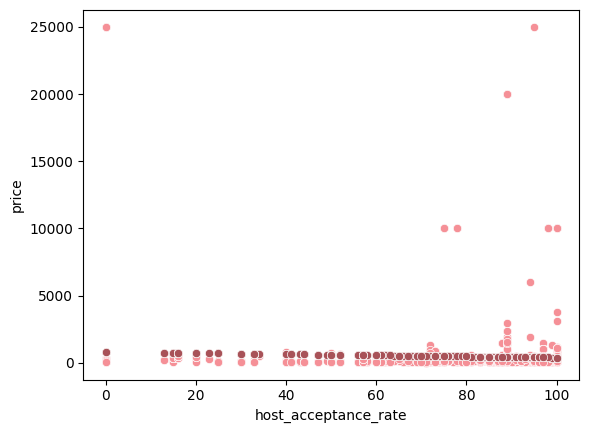

In [30]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='host_acceptance_rate', y='price', color="#F59097", data=private_room)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones2', color="#A85258", data=private_room)

In [31]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.0018580767213610683
Coeficiente de correlación:  0.043105414060893424


## **“host_acceptance_rate vs number_of_reviews”**

<Axes: xlabel='host_acceptance_rate', ylabel='number_of_reviews'>

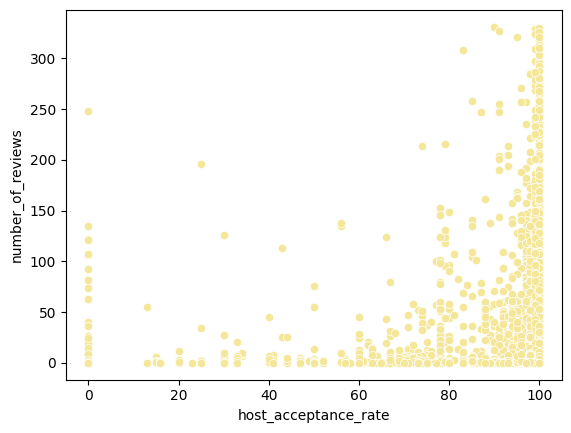

In [32]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='host_acceptance_rate', y='number_of_reviews',color="#F5E79A",data=private_room)

In [33]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= private_room[['host_acceptance_rate']]
Var_Dep= private_room['number_of_reviews']

In [34]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [35]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [36]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [37]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.50571297]),
 'rank_': 1,
 'singular_': array([988.2429988]),
 'intercept_': -3.843042916440403}

Modelo matemático: y= 0.50571297x + 3.843042916440403

In [38]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.02395703806390337

In [39]:
#Predecimos los valores de total 
y_pred= model.predict(X=private_room[['host_acceptance_rate']])
y_pred

array([33.07400374, 41.6711242 , 30.03972594, ..., 46.72825388,
       46.72825388, 21.44260548])

In [40]:
#Insertamos la columna de predicciones en el DataFrame
private_room.insert(0, 'Predicciones3', y_pred)
private_room.head()

,Predicciones3,Predicciones2,Predicciones,Unnamed: 0,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
2,33.074004,500.403860,90.861230,2,8142.0,2.020000e+13,21994,13.0,14.0,37.76555,...,Private room,4 shared baths,"[""Security cameras on property"", ""Host greets ...",56.0,t,06/03/2023,08/09/2014,27/10/2022,City Registration Pending,f
4,41.671124,428.290298,93.488042,4,8739.0,2.020000e+13,7149,2.0,2.0,37.76030,...,Private room,1 private bath,"[""Paid parking garage off premises"", ""Luggage ...",110.0,t,06/03/2023,01/08/2009,25/02/2023,STR-0000028,f
6,30.039726,525.855705,89.934120,6,490931.0,2.020000e+13,1269188,1.0,3.0,37.74766,...,Private room,1 bath,"[""Oven"", ""Cooking basics"", ""Blender"", ""Shampoo...",100.0,t,06/03/2023,22/04/2014,26/11/2022,STR-0002192,f
7,46.728254,385.870556,95.033226,7,10537.0,2.020000e+13,36752,2.0,3.0,37.71750,...,Private room,1.5 shared baths,"[""Self check-in"", ""Shared BBQ grill: charcoal""...",95.0,t,06/03/2023,21/02/2010,28/01/2023,2022-011003STR,f
11,46.728254,385.870556,95.033226,11,144978.0,2.020000e+13,216682,9.0,9.0,37.79233,...,Private room,1 bath,"[""Essentials"", ""Bed linens"", ""Carbon monoxide ...",55.0,t,06/03/2023,10/07/2011,28/02/2023,2022-011317STR,f


<Axes: xlabel='host_acceptance_rate', ylabel='number_of_reviews'>

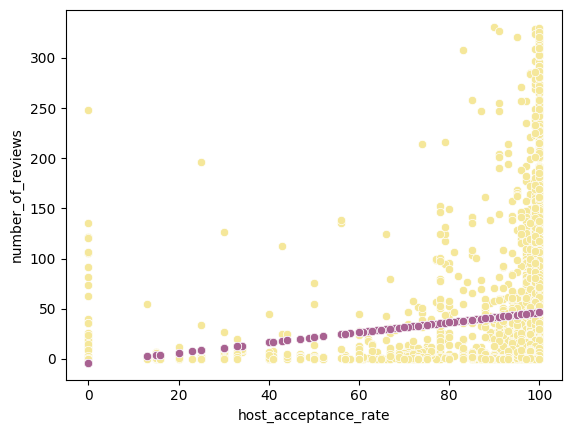

In [41]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='host_acceptance_rate', y='number_of_reviews', color="#F5E79A", data=private_room)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones3', color="#A86291", data=private_room)

In [42]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.02395703806390337
Coeficiente de correlación:  0.1547806126874531


## **“review_scores_location vs review_scores_cleanliness**

<Axes: xlabel='review_scores_location', ylabel='review_scores_cleanliness'>

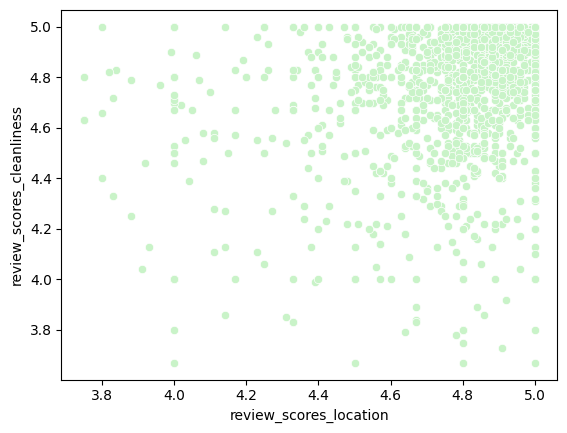

In [43]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='review_scores_location', y='review_scores_cleanliness',color="#C9F3C8", data=private_room)

In [44]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= private_room[['review_scores_location']]
Var_Dep= private_room['review_scores_cleanliness']

In [45]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [46]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [47]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [48]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_location'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.32261385]),
 'rank_': 1,
 'singular_': array([10.40885592]),
 'intercept_': 3.2297154908976227}

Modelo matemático: y=  0.32261385x + 3.2297154908976227

In [49]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.08133382831247016

In [50]:
#Predecimos los valores de total 
y_pred= model.predict(X=private_room[['review_scores_location']])
y_pred

array([4.73632215, 4.82020175, 4.76858354, ..., 4.77826195, 4.77826195,
       4.77826195])

In [51]:
#Insertamos la columna de predicciones en el DataFrame
private_room.insert(0, 'Predicciones4', y_pred)
private_room.head()

,Predicciones4,Predicciones3,Predicciones2,Predicciones,Unnamed: 0,id,scrape_id,host_id,host_listings_count,host_total_listings_count,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
2,4.736322,33.074004,500.403860,90.861230,2,8142.0,2.020000e+13,21994,13.0,14.0,...,Private room,4 shared baths,"[""Security cameras on property"", ""Host greets ...",56.0,t,06/03/2023,08/09/2014,27/10/2022,City Registration Pending,f
4,4.820202,41.671124,428.290298,93.488042,4,8739.0,2.020000e+13,7149,2.0,2.0,...,Private room,1 private bath,"[""Paid parking garage off premises"", ""Luggage ...",110.0,t,06/03/2023,01/08/2009,25/02/2023,STR-0000028,f
6,4.768584,30.039726,525.855705,89.934120,6,490931.0,2.020000e+13,1269188,1.0,3.0,...,Private room,1 bath,"[""Oven"", ""Cooking basics"", ""Blender"", ""Shampoo...",100.0,t,06/03/2023,22/04/2014,26/11/2022,STR-0002192,f
7,4.565337,46.728254,385.870556,95.033226,7,10537.0,2.020000e+13,36752,2.0,3.0,...,Private room,1.5 shared baths,"[""Self check-in"", ""Shared BBQ grill: charcoal""...",95.0,t,06/03/2023,21/02/2010,28/01/2023,2022-011003STR,f
11,4.784714,46.728254,385.870556,95.033226,11,144978.0,2.020000e+13,216682,9.0,9.0,...,Private room,1 bath,"[""Essentials"", ""Bed linens"", ""Carbon monoxide ...",55.0,t,06/03/2023,10/07/2011,28/02/2023,2022-011317STR,f


<Axes: xlabel='review_scores_location', ylabel='review_scores_cleanliness'>

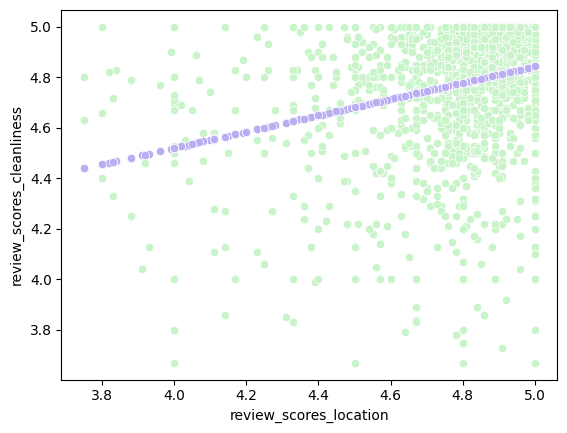

In [52]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='review_scores_location', y='review_scores_cleanliness', color="#C9F3C8", data=private_room)
sns.scatterplot(x='review_scores_location', y='Predicciones4', color="#BAAEF2", data=private_room)

In [53]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.08133382831247016
Coeficiente de correlación:  0.2851908629540402


## **“availability_365 vs number_of_reviews”**

<Axes: xlabel='availability_365', ylabel='number_of_reviews'>

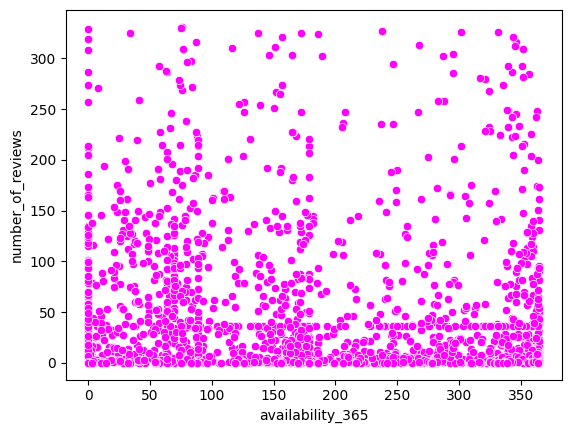

In [54]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='availability_365', y='number_of_reviews',color="magenta",data=private_room)

In [55]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= private_room[['availability_365']]
Var_Dep= private_room['number_of_reviews']

In [56]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [57]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [58]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [59]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['availability_365'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.03049553]),
 'rank_': 1,
 'singular_': array([6569.09513952]),
 'intercept_': 46.936315052908334}

Modelo matemático: y= 0.03049553x + 46.936315052908334

In [60]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.003849293729428549

In [61]:
#Predecimos los valores de total 
y_pred= model.predict(X=private_room[['availability_365']])
y_pred

array([35.80544497, 42.08752507, 36.84229314, ..., 36.59832886,
       35.8359405 , 41.47761438])

In [62]:
#Insertamos la columna de predicciones en el DataFrame
private_room.insert(0, 'Predicciones5', y_pred)
private_room.head()

,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones,Unnamed: 0,id,scrape_id,host_id,host_listings_count,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
2,35.805445,4.736322,33.074004,500.403860,90.861230,2,8142.0,2.020000e+13,21994,13.0,...,Private room,4 shared baths,"[""Security cameras on property"", ""Host greets ...",56.0,t,06/03/2023,08/09/2014,27/10/2022,City Registration Pending,f
4,42.087525,4.820202,41.671124,428.290298,93.488042,4,8739.0,2.020000e+13,7149,2.0,...,Private room,1 private bath,"[""Paid parking garage off premises"", ""Luggage ...",110.0,t,06/03/2023,01/08/2009,25/02/2023,STR-0000028,f
6,36.842293,4.768584,30.039726,525.855705,89.934120,6,490931.0,2.020000e+13,1269188,1.0,...,Private room,1 bath,"[""Oven"", ""Cooking basics"", ""Blender"", ""Shampoo...",100.0,t,06/03/2023,22/04/2014,26/11/2022,STR-0002192,f
7,35.805445,4.565337,46.728254,385.870556,95.033226,7,10537.0,2.020000e+13,36752,2.0,...,Private room,1.5 shared baths,"[""Self check-in"", ""Shared BBQ grill: charcoal""...",95.0,t,06/03/2023,21/02/2010,28/01/2023,2022-011003STR,f
11,45.259061,4.784714,46.728254,385.870556,95.033226,11,144978.0,2.020000e+13,216682,9.0,...,Private room,1 bath,"[""Essentials"", ""Bed linens"", ""Carbon monoxide ...",55.0,t,06/03/2023,10/07/2011,28/02/2023,2022-011317STR,f


<Axes: xlabel='availability_365', ylabel='number_of_reviews'>

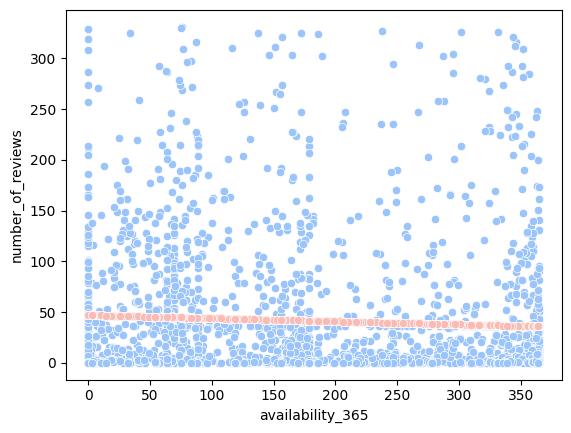

In [63]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='availability_365', y='number_of_reviews', color="#9AC4FA", data=private_room)
sns.scatterplot(x='availability_365', y='Predicciones5', color="#FABBB4", data=private_room)

In [64]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.003849293729428549
Coeficiente de correlación:  0.06204267667846503


## **“reviews_per_month vs review_scores_communication”**

<Axes: xlabel='reviews_per_month', ylabel='review_scores_communication'>

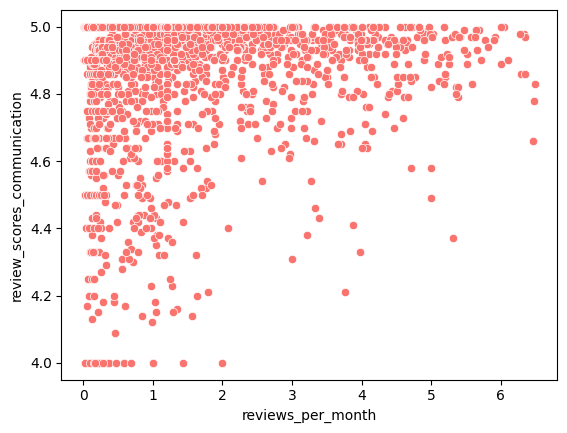

In [65]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='reviews_per_month', y='review_scores_communication',color="#F9746F",data=private_room)

In [66]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= private_room[['reviews_per_month']]
Var_Dep= private_room['review_scores_communication']

In [67]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [68]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [69]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [70]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['reviews_per_month'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.00782912]),
 'rank_': 1,
 'singular_': array([62.06860378]),
 'intercept_': 4.861134921387813}

Modelo matemático: y= 0.00782912x + 4.861134921387813

In [71]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.002754609444383327

In [72]:
#Predecimos los valores de total 
y_pred= model.predict(X=private_room[['reviews_per_month']])
y_pred

array([4.86183954, 4.89754032, 4.86692847, ..., 4.87131278, 4.87131278,
       4.87131278])

In [73]:
#Insertamos la columna de predicciones en el DataFrame
private_room.insert(0, 'Predicciones6', y_pred)
private_room.head()

,Predicciones6,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones,Unnamed: 0,id,scrape_id,host_id,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
2,4.861840,35.805445,4.736322,33.074004,500.403860,90.861230,2,8142.0,2.020000e+13,21994,...,Private room,4 shared baths,"[""Security cameras on property"", ""Host greets ...",56.0,t,06/03/2023,08/09/2014,27/10/2022,City Registration Pending,f
4,4.897540,42.087525,4.820202,41.671124,428.290298,93.488042,4,8739.0,2.020000e+13,7149,...,Private room,1 private bath,"[""Paid parking garage off premises"", ""Luggage ...",110.0,t,06/03/2023,01/08/2009,25/02/2023,STR-0000028,f
6,4.866928,36.842293,4.768584,30.039726,525.855705,89.934120,6,490931.0,2.020000e+13,1269188,...,Private room,1 bath,"[""Oven"", ""Cooking basics"", ""Blender"", ""Shampoo...",100.0,t,06/03/2023,22/04/2014,26/11/2022,STR-0002192,f
7,4.862074,35.805445,4.565337,46.728254,385.870556,95.033226,7,10537.0,2.020000e+13,36752,...,Private room,1.5 shared baths,"[""Self check-in"", ""Shared BBQ grill: charcoal""...",95.0,t,06/03/2023,21/02/2010,28/01/2023,2022-011003STR,f
11,4.867790,45.259061,4.784714,46.728254,385.870556,95.033226,11,144978.0,2.020000e+13,216682,...,Private room,1 bath,"[""Essentials"", ""Bed linens"", ""Carbon monoxide ...",55.0,t,06/03/2023,10/07/2011,28/02/2023,2022-011317STR,f


<Axes: xlabel='reviews_per_month', ylabel='review_scores_communication'>

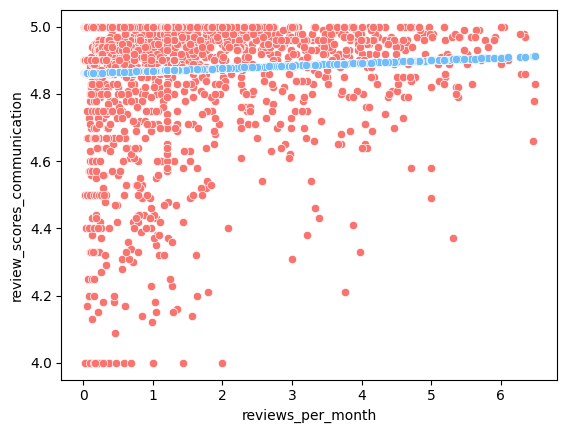

In [74]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='reviews_per_month', y='review_scores_communication', color="#F9746F", data=private_room)
sns.scatterplot(x='reviews_per_month', y='Predicciones6', color="#70BDFA", data=private_room)

In [75]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.002754609444383327
Coeficiente de correlación:  0.05248437333514926


In [76]:
#Encontramos todas las correlaciones entre las variables 
Corr_Factors=private_room.corr()
Corr_Factors

<ipython-input-76-5346aab0bab6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr_Factors=private_room.corr()


,Predicciones6,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones,Unnamed: 0,id,scrape_id,host_id,...,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_rate,host_acceptance_rate,price
Predicciones6,1.000000,-0.003612,-0.016570,0.199118,-0.199118,0.199118,0.055878,0.088523,NaN,0.126409,...,-0.016570,0.068921,-0.220356,-0.144656,-0.168021,-0.024851,1.000000,0.102838,0.199118,-0.056107
Predicciones5,-0.003612,1.000000,0.093602,0.034304,-0.034304,0.034304,-0.142890,-0.144164,NaN,-0.185568,...,0.093602,0.152425,-0.067536,0.020758,-0.017650,-0.090721,-0.003612,0.153332,0.034304,-0.011966
Predicciones4,-0.016570,0.093602,1.000000,-0.061273,0.061273,-0.061273,-0.026759,-0.034858,NaN,-0.083484,...,1.000000,0.365728,0.051762,0.038073,0.016550,-0.024004,-0.016570,-0.004669,-0.061273,0.015556
Predicciones3,0.199118,0.034304,-0.061273,1.000000,-1.000000,1.000000,0.065831,0.036941,NaN,0.104054,...,-0.061273,-0.065914,0.058996,-0.021109,0.019417,0.035833,0.199118,0.160031,1.000000,-0.043105
Predicciones2,-0.199118,-0.034304,0.061273,-1.000000,1.000000,-1.000000,-0.065831,-0.036941,NaN,-0.104054,...,0.061273,0.065914,-0.058996,0.021109,-0.019417,-0.035833,-0.199118,-0.160031,-1.000000,0.043105
Predicciones,0.199118,0.034304,-0.061273,1.000000,-1.000000,1.000000,0.065831,0.036941,NaN,0.104054,...,-0.061273,-0.065914,0.058996,-0.021109,0.019417,0.035833,0.199118,0.160031,1.000000,-0.043105
Unnamed: 0,0.055878,-0.142890,-0.026759,0.065831,-0.065831,0.065831,1.000000,0.739670,NaN,0.551004,...,-0.026759,0.023584,-0.034936,0.028614,0.102215,0.054010,0.055878,-0.018227,0.065831,0.032883
id,0.088523,-0.144164,-0.034858,0.036941,-0.036941,0.036941,0.739670,1.000000,NaN,0.360022,...,-0.034858,0.048473,-0.086402,-0.032657,0.152695,0.012575,0.088523,0.059590,0.036941,0.031884
scrape_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,0.126409,-0.185568,-0.083484,0.104054,-0.104054,0.104054,0.551004,0.360022,NaN,1.000000,...,-0.083484,-0.121998,0.083065,-0.128067,0.066273,0.042191,0.126409,-0.131046,0.104054,0.117445


In [77]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,Predicciones6,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones,Unnamed: 0,id,scrape_id,host_id,...,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_rate,host_acceptance_rate,price
Predicciones6,1.000000,0.003612,0.016570,0.199118,0.199118,0.199118,0.055878,0.088523,NaN,0.126409,...,0.016570,0.068921,0.220356,0.144656,0.168021,0.024851,1.000000,0.102838,0.199118,0.056107
Predicciones5,0.003612,1.000000,0.093602,0.034304,0.034304,0.034304,0.142890,0.144164,NaN,0.185568,...,0.093602,0.152425,0.067536,0.020758,0.017650,0.090721,0.003612,0.153332,0.034304,0.011966
Predicciones4,0.016570,0.093602,1.000000,0.061273,0.061273,0.061273,0.026759,0.034858,NaN,0.083484,...,1.000000,0.365728,0.051762,0.038073,0.016550,0.024004,0.016570,0.004669,0.061273,0.015556
Predicciones3,0.199118,0.034304,0.061273,1.000000,1.000000,1.000000,0.065831,0.036941,NaN,0.104054,...,0.061273,0.065914,0.058996,0.021109,0.019417,0.035833,0.199118,0.160031,1.000000,0.043105
Predicciones2,0.199118,0.034304,0.061273,1.000000,1.000000,1.000000,0.065831,0.036941,NaN,0.104054,...,0.061273,0.065914,0.058996,0.021109,0.019417,0.035833,0.199118,0.160031,1.000000,0.043105
Predicciones,0.199118,0.034304,0.061273,1.000000,1.000000,1.000000,0.065831,0.036941,NaN,0.104054,...,0.061273,0.065914,0.058996,0.021109,0.019417,0.035833,0.199118,0.160031,1.000000,0.043105
Unnamed: 0,0.055878,0.142890,0.026759,0.065831,0.065831,0.065831,1.000000,0.739670,NaN,0.551004,...,0.026759,0.023584,0.034936,0.028614,0.102215,0.054010,0.055878,0.018227,0.065831,0.032883
id,0.088523,0.144164,0.034858,0.036941,0.036941,0.036941,0.739670,1.000000,NaN,0.360022,...,0.034858,0.048473,0.086402,0.032657,0.152695,0.012575,0.088523,0.059590,0.036941,0.031884
scrape_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,0.126409,0.185568,0.083484,0.104054,0.104054,0.104054,0.551004,0.360022,NaN,1.000000,...,0.083484,0.121998,0.083065,0.128067,0.066273,0.042191,0.126409,0.131046,0.104054,0.117445


<Axes: >

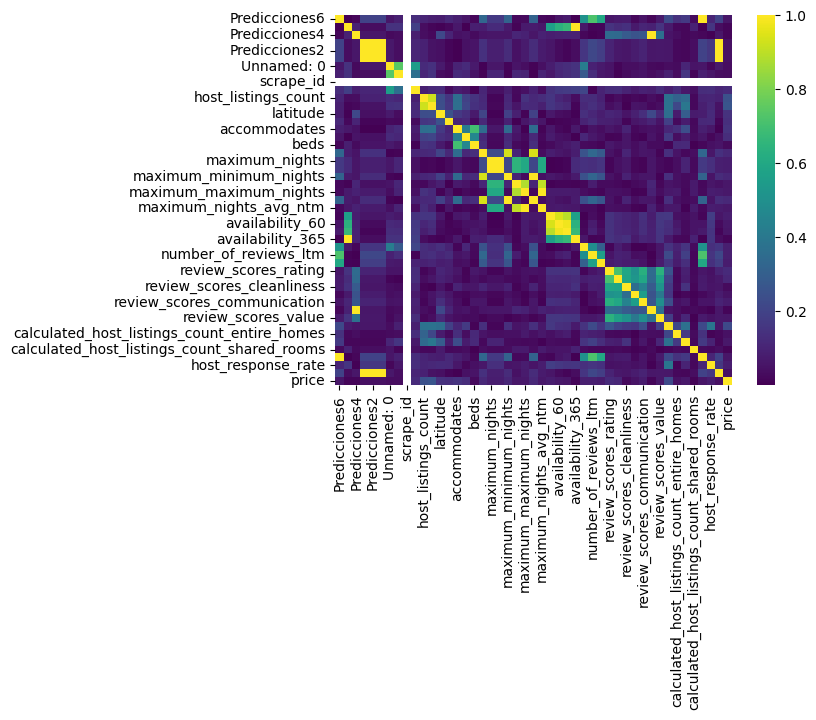

In [78]:
#Graficamos el mapa de calor de los coeficientes de correlación 
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'viridis')  
Heat_Map

<Axes: >

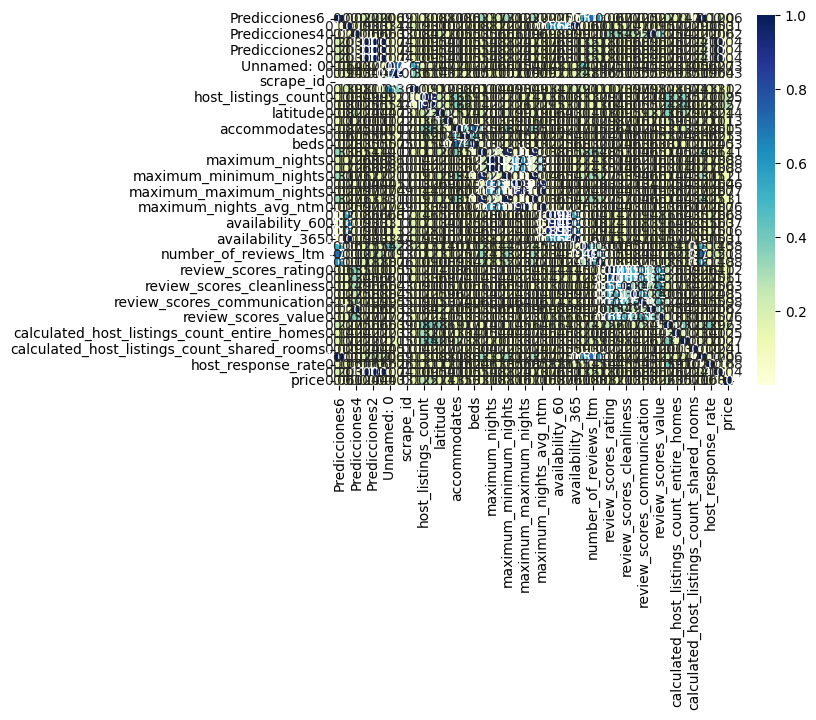

In [79]:
#Ajustamos el mapa de calor de los coeficientes de correlación 
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'YlGnBu', annot=True, fmt=".2f")  
Heat_Map

# **Tipo de habitación: hotel room**

In [81]:
df= pd.read_csv("data_clean_california_eua.csv")
df.head()

,Unnamed: 0,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,0,958.0,2.020000e+13,1169,1.0,1.0,37.77028,-122.43317,3.0,1.0,...,Entire home/apt,1 bath,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",202.0,t,06/03/2023,23/07/2009,19/02/2023,City Registration Pending,f
1,1,5858.0,2.020000e+13,8904,2.0,2.0,37.74474,-122.42089,4.0,2.0,...,Entire home/apt,1 bath,"[""Essentials"", ""Carbon monoxide alarm"", ""Hange...",235.0,t,06/03/2023,03/05/2009,06/08/2017,City Registration Pending,f
2,2,8142.0,2.020000e+13,21994,13.0,14.0,37.76555,-122.45213,1.0,1.0,...,Private room,4 shared baths,"[""Security cameras on property"", ""Host greets ...",56.0,t,06/03/2023,08/09/2014,27/10/2022,City Registration Pending,f
3,3,8339.0,2.020000e+13,24215,2.0,6.0,37.77564,-122.43642,4.0,2.0,...,Entire home/apt,1.5 baths,"[""Oven"", ""Cooking basics"", ""TV"", ""Smoke alarm""...",575.0,t,06/03/2023,25/09/2009,28/06/2019,STR-0000264,f
4,4,8739.0,2.020000e+13,7149,2.0,2.0,37.76030,-122.42197,3.0,1.0,...,Private room,1 private bath,"[""Paid parking garage off premises"", ""Luggage ...",110.0,t,06/03/2023,01/08/2009,25/02/2023,STR-0000028,f


In [82]:
#No se porque sale que hay nulos si en el archivo del pais dice que hay 0 nulos
#para que no haya errores todos los nulos los reemplazo con bfill
df.fillna(method='bfill', inplace=True)

In [83]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=df.isnull().sum().sum()
valores_nulos

0

##**“host_acceptance_rate vs host_response_rate”**

In [84]:
hotel = df[df['room_type'] == 'Hotel room']

In [ ]:
#Cambiar datos['host_response_rate'].astype(str)  
hotel['host_response_rate'] = hotel['host_response_rate'].str.replace('%', '')  
hotel['host_response_rate'] = pd.to_numeric(hotel['host_response_rate'], errors='coerce') 

<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

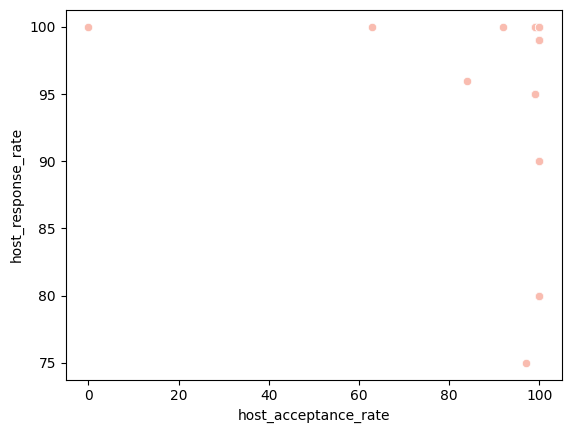

In [86]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='host_acceptance_rate', y='host_response_rate',color="#F9BCB0",data=hotel)

In [87]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= hotel[['host_acceptance_rate']]
Var_Dep= hotel['host_response_rate']

In [88]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [89]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [90]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [91]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.08272082]),
 'rank_': 1,
 'singular_': array([105.42441696]),
 'intercept_': 101.72287280428553}

Modelo matemático: y= 0.08272082x + 101.72287280428553

In [92]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.022145351275038583

In [93]:
#Predecimos los valores de total 
y_pred= model.predict(X=hotel[['host_acceptance_rate']])
y_pred

array([ 93.45079108,  93.45079108,  94.11255762,  93.45079108,
        93.45079108,  93.45079108,  93.45079108,  93.45079108,
        93.45079108,  93.45079108,  93.45079108,  93.45079108,
        93.45079108,  93.45079108,  93.45079108,  94.77432416,
        93.45079108,  93.45079108,  93.45079108,  93.45079108,
        93.45079108,  93.45079108,  93.5335119 ,  93.5335119 ,
        93.5335119 ,  93.5335119 ,  93.5335119 ,  93.5335119 ,
        93.5335119 ,  93.5335119 ,  93.5335119 ,  93.45079108,
        93.45079108,  93.45079108,  93.45079108,  93.5335119 ,
        93.5335119 ,  93.5335119 ,  93.69895353,  93.45079108,
        93.45079108,  93.45079108,  93.45079108,  93.45079108,
        93.45079108,  96.51146132,  93.45079108,  93.45079108,
        93.45079108,  93.45079108, 101.7228728 ,  93.45079108])

In [94]:
#Insertamos la columna de predicciones en el DataFrame
hotel.insert(0, 'Predicciones', y_pred)
hotel.head()

,Predicciones,Unnamed: 0,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
711,93.450791,711,4631873.0,2.020000e+13,20850212,16.0,17.0,37.79920,-122.42358,2.0,...,Hotel room,1 private bath,"[""Essentials"", ""Carbon monoxide alarm"", ""Build...",98.0,t,06/03/2023,22/11/2014,19/02/2023,FY 2017-18,t
787,93.450791,787,6169292.0,2.020000e+13,20850212,16.0,17.0,37.79696,-122.42539,4.0,...,Hotel room,1 private bath,"[""Security cameras on property"", ""Self check-i...",129.0,t,06/03/2023,25/05/2015,11/12/2022,FY 2017-18,t
938,94.112558,938,6883183.0,2.020000e+13,23593310,5.0,10.0,37.78729,-122.40928,4.0,...,Hotel room,1 private bath,"[""Self check-in"", ""Shampoo"", ""Air conditioning...",250.0,t,06/03/2023,05/09/2015,01/08/2021,License not needed per OSTR,f
1704,93.450791,1704,16001051.0,2.020000e+13,103884979,14.0,15.0,37.77722,-122.41560,1.0,...,Hotel room,4 shared baths,"[""Paid parking garage off premises"", ""Security...",91.0,t,06/03/2023,10/02/2017,20/02/2023,Exempt,f
2229,93.450791,2229,23271377.0,2.020000e+13,173206762,61.0,63.0,37.78669,-122.40882,2.0,...,Hotel room,1 private bath,"[""Security cameras on property"", ""Shampoo"", ""T...",119.0,t,06/03/2023,22/05/2019,04/09/2022,1083521,t


<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

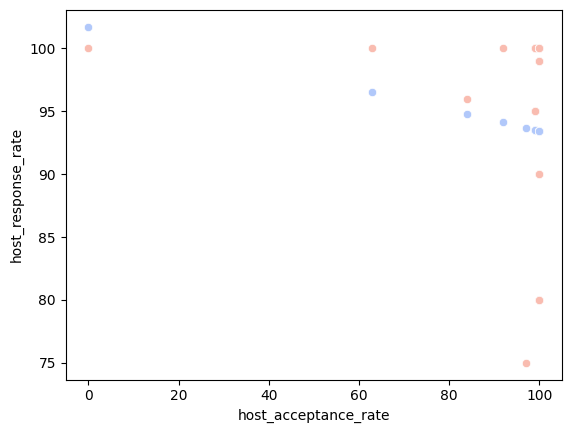

In [95]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='host_acceptance_rate', y='host_response_rate', color="#F9BCB0", data=hotel)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones', color="#B1C8FA", data=hotel)

In [96]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.022145351275038583
Coeficiente de correlación:  0.14881314214490124


## **“host_acceptance_rate vs price”**

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

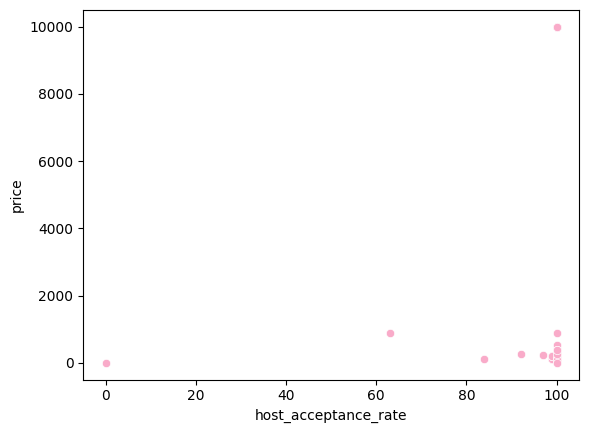

In [97]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='host_acceptance_rate', y='price',color="#F9ABC9",data=hotel)

In [98]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= hotel[['host_acceptance_rate']]
Var_Dep= hotel['price']

In [99]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [100]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [101]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [102]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([11.44410531]),
 'rank_': 1,
 'singular_': array([105.42441696]),
 'intercept_': -160.31125160915224}

Modelo matematico: y= 11.44410531x + 160.31125160915224

In [103]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.004080089810583165

In [104]:
#Predecimos los valores de total 
y_pred= model.predict(X=hotel[['host_acceptance_rate']])
y_pred

array([ 984.09927951,  984.09927951,  892.54643703,  984.09927951,
        984.09927951,  984.09927951,  984.09927951,  984.09927951,
        984.09927951,  984.09927951,  984.09927951,  984.09927951,
        984.09927951,  984.09927951,  984.09927951,  800.99359454,
        984.09927951,  984.09927951,  984.09927951,  984.09927951,
        984.09927951,  984.09927951,  972.6551742 ,  972.6551742 ,
        972.6551742 ,  972.6551742 ,  972.6551742 ,  972.6551742 ,
        972.6551742 ,  972.6551742 ,  972.6551742 ,  984.09927951,
        984.09927951,  984.09927951,  984.09927951,  972.6551742 ,
        972.6551742 ,  972.6551742 ,  949.76696358,  984.09927951,
        984.09927951,  984.09927951,  984.09927951,  984.09927951,
        984.09927951,  560.667383  ,  984.09927951,  984.09927951,
        984.09927951,  984.09927951, -160.31125161,  984.09927951])

In [105]:
#Insertamos la columna de predicciones en el DataFrame
hotel.insert(0, 'Predicciones2', y_pred)
hotel.head()

,Predicciones2,Predicciones,Unnamed: 0,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
711,984.099280,93.450791,711,4631873.0,2.020000e+13,20850212,16.0,17.0,37.79920,-122.42358,...,Hotel room,1 private bath,"[""Essentials"", ""Carbon monoxide alarm"", ""Build...",98.0,t,06/03/2023,22/11/2014,19/02/2023,FY 2017-18,t
787,984.099280,93.450791,787,6169292.0,2.020000e+13,20850212,16.0,17.0,37.79696,-122.42539,...,Hotel room,1 private bath,"[""Security cameras on property"", ""Self check-i...",129.0,t,06/03/2023,25/05/2015,11/12/2022,FY 2017-18,t
938,892.546437,94.112558,938,6883183.0,2.020000e+13,23593310,5.0,10.0,37.78729,-122.40928,...,Hotel room,1 private bath,"[""Self check-in"", ""Shampoo"", ""Air conditioning...",250.0,t,06/03/2023,05/09/2015,01/08/2021,License not needed per OSTR,f
1704,984.099280,93.450791,1704,16001051.0,2.020000e+13,103884979,14.0,15.0,37.77722,-122.41560,...,Hotel room,4 shared baths,"[""Paid parking garage off premises"", ""Security...",91.0,t,06/03/2023,10/02/2017,20/02/2023,Exempt,f
2229,984.099280,93.450791,2229,23271377.0,2.020000e+13,173206762,61.0,63.0,37.78669,-122.40882,...,Hotel room,1 private bath,"[""Security cameras on property"", ""Shampoo"", ""T...",119.0,t,06/03/2023,22/05/2019,04/09/2022,1083521,t


<Axes: xlabel='host_acceptance_rate', ylabel='price'>

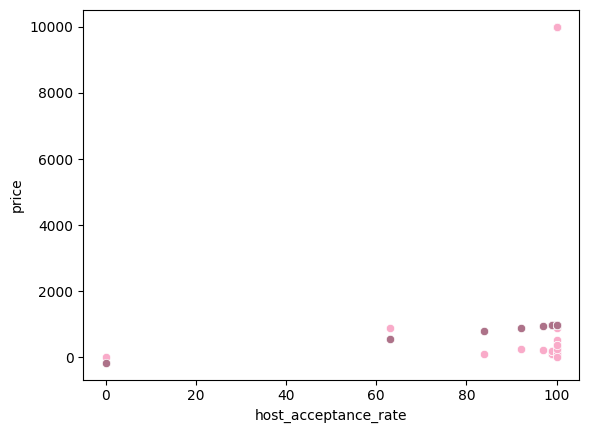

In [106]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='host_acceptance_rate', y='price', color="#F9ABC9", data=hotel)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones2', color="#AD7289", data=hotel)

In [107]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.004080089810583165
Coeficiente de correlación:  0.06387558070642618


## **“host_acceptance_rate vs number_of_reviews”**

<Axes: xlabel='host_acceptance_rate', ylabel='number_of_reviews'>

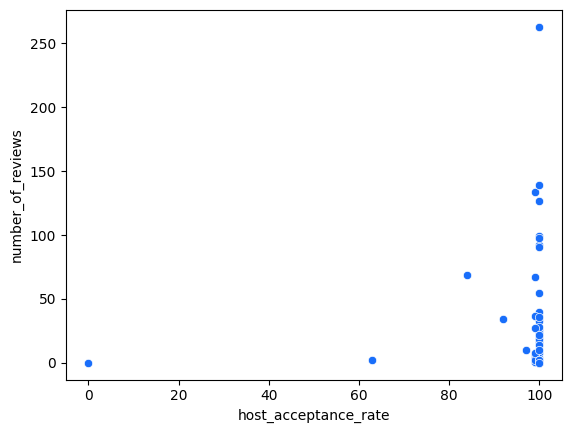

In [108]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='host_acceptance_rate', y='number_of_reviews',color="#196EFA",data=hotel)

In [109]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= hotel[['host_acceptance_rate']]
Var_Dep= hotel['number_of_reviews']

In [110]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [111]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [112]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [113]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.37586756]),
 'rank_': 1,
 'singular_': array([105.42441696]),
 'intercept_': -2.49920407513531}

Modelo matemático: y= 0.37586756x + 2.49920407513531

In [114]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.012564541690534003

In [115]:
#Predecimos los valores de total 
y_pred= model.predict(X=hotel[['host_acceptance_rate']])
y_pred

array([35.08755174, 35.08755174, 32.08061127, 35.08755174, 35.08755174,
       35.08755174, 35.08755174, 35.08755174, 35.08755174, 35.08755174,
       35.08755174, 35.08755174, 35.08755174, 35.08755174, 35.08755174,
       29.07367081, 35.08755174, 35.08755174, 35.08755174, 35.08755174,
       35.08755174, 35.08755174, 34.71168418, 34.71168418, 34.71168418,
       34.71168418, 34.71168418, 34.71168418, 34.71168418, 34.71168418,
       34.71168418, 35.08755174, 35.08755174, 35.08755174, 35.08755174,
       34.71168418, 34.71168418, 34.71168418, 33.95994906, 35.08755174,
       35.08755174, 35.08755174, 35.08755174, 35.08755174, 35.08755174,
       21.18045209, 35.08755174, 35.08755174, 35.08755174, 35.08755174,
       -2.49920408, 35.08755174])

In [116]:
#Insertamos la columna de predicciones en el DataFrame
hotel.insert(0, 'Predicciones3', y_pred)
hotel.head()

,Predicciones3,Predicciones2,Predicciones,Unnamed: 0,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
711,35.087552,984.099280,93.450791,711,4631873.0,2.020000e+13,20850212,16.0,17.0,37.79920,...,Hotel room,1 private bath,"[""Essentials"", ""Carbon monoxide alarm"", ""Build...",98.0,t,06/03/2023,22/11/2014,19/02/2023,FY 2017-18,t
787,35.087552,984.099280,93.450791,787,6169292.0,2.020000e+13,20850212,16.0,17.0,37.79696,...,Hotel room,1 private bath,"[""Security cameras on property"", ""Self check-i...",129.0,t,06/03/2023,25/05/2015,11/12/2022,FY 2017-18,t
938,32.080611,892.546437,94.112558,938,6883183.0,2.020000e+13,23593310,5.0,10.0,37.78729,...,Hotel room,1 private bath,"[""Self check-in"", ""Shampoo"", ""Air conditioning...",250.0,t,06/03/2023,05/09/2015,01/08/2021,License not needed per OSTR,f
1704,35.087552,984.099280,93.450791,1704,16001051.0,2.020000e+13,103884979,14.0,15.0,37.77722,...,Hotel room,4 shared baths,"[""Paid parking garage off premises"", ""Security...",91.0,t,06/03/2023,10/02/2017,20/02/2023,Exempt,f
2229,35.087552,984.099280,93.450791,2229,23271377.0,2.020000e+13,173206762,61.0,63.0,37.78669,...,Hotel room,1 private bath,"[""Security cameras on property"", ""Shampoo"", ""T...",119.0,t,06/03/2023,22/05/2019,04/09/2022,1083521,t


<Axes: xlabel='host_acceptance_rate', ylabel='number_of_reviews'>

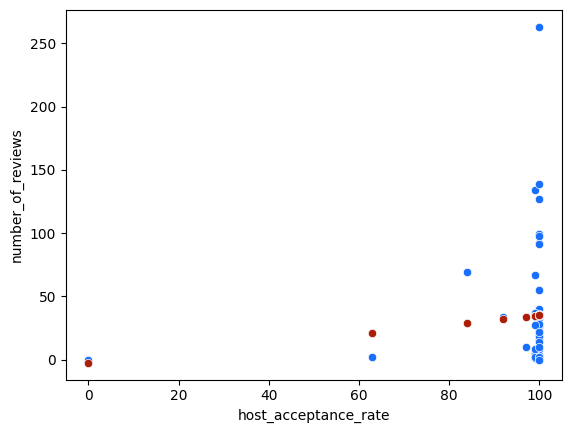

In [117]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='host_acceptance_rate', y='number_of_reviews', color="#196EFA", data=hotel)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones3', color="#AD1E09", data=hotel)

In [118]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.012564541690534003
Coeficiente de correlación:  0.11209166646336383


## **“review_scores_location vs review_scores_cleanliness"**

<Axes: xlabel='review_scores_location', ylabel='review_scores_cleanliness'>

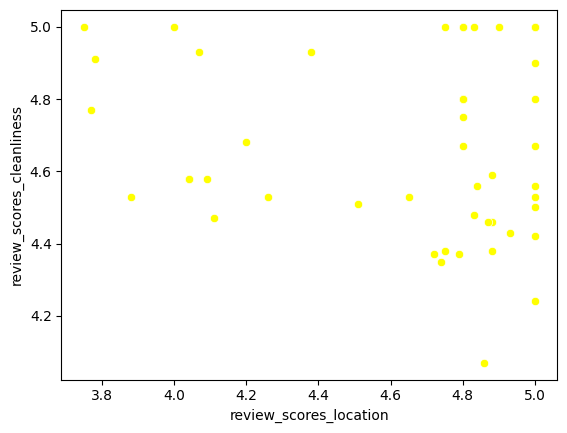

In [119]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='review_scores_location', y='review_scores_cleanliness',color="yellow", data=hotel)

In [120]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= hotel[['review_scores_location']]
Var_Dep= hotel['review_scores_cleanliness']

In [121]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [122]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [123]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [124]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_location'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.04301732]),
 'rank_': 1,
 'singular_': array([2.81491221]),
 'intercept_': 4.886471902804138}

Modelo matemático: y= 0.04301732x + 4.886471902804138




In [125]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.004558116467528905

In [126]:
#Predecimos los valores de total 
y_pred= model.predict(X=hotel[['review_scores_location']])
y_pred

array([4.67654736, 4.67826806, 4.67138528, 4.71956469, 4.68213961,
       4.67138528, 4.67138528, 4.67138528, 4.67138528, 4.67654736,
       4.67869823, 4.6743965 , 4.67138528, 4.68213961, 4.68041892,
       4.67697754, 4.7096707 , 4.67138528, 4.67998875, 4.67138528,
       4.67138528, 4.67998875, 4.67869823, 4.67998875, 4.71139139,
       4.67998875, 4.71440261, 4.72515694, 4.67998875, 4.72386642,
       4.67998875, 4.71268191, 4.7032181 , 4.69805602, 4.72429659,
       4.68644135, 4.67654736, 4.69246377, 4.67568702, 4.71053105,
       4.68256979, 4.68343013, 4.67740771, 4.70579914, 4.71268191,
       4.67138528, 4.67138528, 4.67138528, 4.67138528, 4.67998875,
       4.67998875, 4.67138528])

In [127]:
#Insertamos la columna de predicciones en el DataFrame
hotel.insert(0, 'Predicciones4', y_pred)
hotel.head()

,Predicciones4,Predicciones3,Predicciones2,Predicciones,Unnamed: 0,id,scrape_id,host_id,host_listings_count,host_total_listings_count,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
711,4.676547,35.087552,984.099280,93.450791,711,4631873.0,2.020000e+13,20850212,16.0,17.0,...,Hotel room,1 private bath,"[""Essentials"", ""Carbon monoxide alarm"", ""Build...",98.0,t,06/03/2023,22/11/2014,19/02/2023,FY 2017-18,t
787,4.678268,35.087552,984.099280,93.450791,787,6169292.0,2.020000e+13,20850212,16.0,17.0,...,Hotel room,1 private bath,"[""Security cameras on property"", ""Self check-i...",129.0,t,06/03/2023,25/05/2015,11/12/2022,FY 2017-18,t
938,4.671385,32.080611,892.546437,94.112558,938,6883183.0,2.020000e+13,23593310,5.0,10.0,...,Hotel room,1 private bath,"[""Self check-in"", ""Shampoo"", ""Air conditioning...",250.0,t,06/03/2023,05/09/2015,01/08/2021,License not needed per OSTR,f
1704,4.719565,35.087552,984.099280,93.450791,1704,16001051.0,2.020000e+13,103884979,14.0,15.0,...,Hotel room,4 shared baths,"[""Paid parking garage off premises"", ""Security...",91.0,t,06/03/2023,10/02/2017,20/02/2023,Exempt,f
2229,4.682140,35.087552,984.099280,93.450791,2229,23271377.0,2.020000e+13,173206762,61.0,63.0,...,Hotel room,1 private bath,"[""Security cameras on property"", ""Shampoo"", ""T...",119.0,t,06/03/2023,22/05/2019,04/09/2022,1083521,t


<Axes: xlabel='review_scores_location', ylabel='review_scores_cleanliness'>

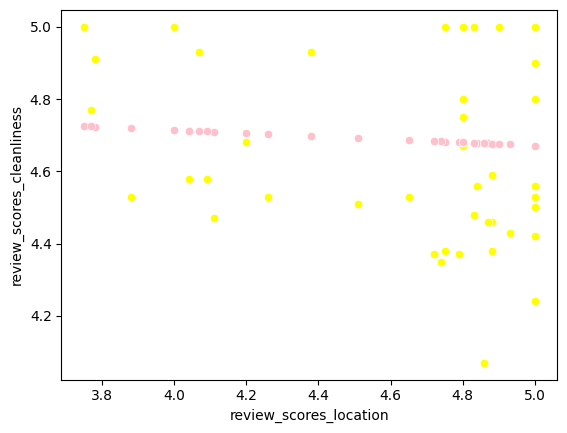

In [128]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='review_scores_location', y='review_scores_cleanliness', color="yellow", data=hotel)
sns.scatterplot(x='review_scores_location', y='Predicciones4', color="pink", data=hotel)

In [129]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.004558116467528905
Coeficiente de correlación:  0.06751382426976645


##**“availability_365 vs number_of_reviews”**

<Axes: xlabel='availability_365', ylabel='number_of_reviews'>

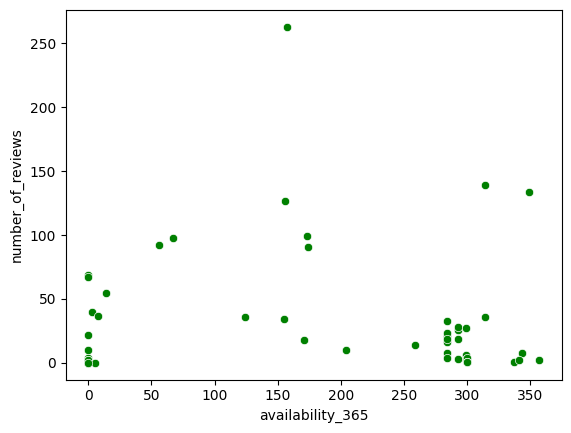

In [130]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='availability_365', y='number_of_reviews',color="green",data=hotel)

In [131]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= hotel[['availability_365']]
Var_Dep= hotel['number_of_reviews']

In [132]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [133]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [134]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [135]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['availability_365'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.0039938]),
 'rank_': 1,
 'singular_': array([981.6853248]),
 'intercept_': 34.50953720409007}

MODELO MATEMATICO y= 0.0039938x + 34.50953720409007

In [136]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.0001230016839102177

In [137]:
#Predecimos los valores de total 
y_pred= model.predict(X=hotel[['availability_365']])
y_pred

array([34.01430641, 33.88251112, 33.89049871, 33.82659797, 33.37529894,
       33.33935477, 33.37529894, 33.37529894, 33.33935477, 33.33935477,
       33.37529894, 33.33935477, 33.37529894, 33.37529894, 33.37529894,
       34.5095372 , 34.45362405, 34.5095372 , 34.5095372 , 34.5095372 ,
       34.5095372 , 34.5095372 , 33.31539199, 33.31539199, 33.31539199,
       33.31139819, 33.31139819, 34.5095372 , 33.31139819, 34.5095372 ,
       34.5095372 , 34.28588459, 33.81861037, 34.49755581, 34.5095372 ,
       33.11570215, 33.13966493, 34.47758683, 33.69480268, 34.24195282,
       33.25548504, 33.25548504, 33.47514386, 33.81461658, 33.88650492,
       34.5095372 , 33.08375178, 33.16362771, 33.14765253, 34.48956822,
       34.5095372 , 34.5095372 ])

In [138]:
#Insertamos la columna de predicciones en el DataFrame
hotel.insert(0, 'Predicciones5', y_pred)
hotel.head()

,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones,Unnamed: 0,id,scrape_id,host_id,host_listings_count,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
711,34.014306,4.676547,35.087552,984.099280,93.450791,711,4631873.0,2.020000e+13,20850212,16.0,...,Hotel room,1 private bath,"[""Essentials"", ""Carbon monoxide alarm"", ""Build...",98.0,t,06/03/2023,22/11/2014,19/02/2023,FY 2017-18,t
787,33.882511,4.678268,35.087552,984.099280,93.450791,787,6169292.0,2.020000e+13,20850212,16.0,...,Hotel room,1 private bath,"[""Security cameras on property"", ""Self check-i...",129.0,t,06/03/2023,25/05/2015,11/12/2022,FY 2017-18,t
938,33.890499,4.671385,32.080611,892.546437,94.112558,938,6883183.0,2.020000e+13,23593310,5.0,...,Hotel room,1 private bath,"[""Self check-in"", ""Shampoo"", ""Air conditioning...",250.0,t,06/03/2023,05/09/2015,01/08/2021,License not needed per OSTR,f
1704,33.826598,4.719565,35.087552,984.099280,93.450791,1704,16001051.0,2.020000e+13,103884979,14.0,...,Hotel room,4 shared baths,"[""Paid parking garage off premises"", ""Security...",91.0,t,06/03/2023,10/02/2017,20/02/2023,Exempt,f
2229,33.375299,4.682140,35.087552,984.099280,93.450791,2229,23271377.0,2.020000e+13,173206762,61.0,...,Hotel room,1 private bath,"[""Security cameras on property"", ""Shampoo"", ""T...",119.0,t,06/03/2023,22/05/2019,04/09/2022,1083521,t


<Axes: xlabel='availability_365', ylabel='number_of_reviews'>

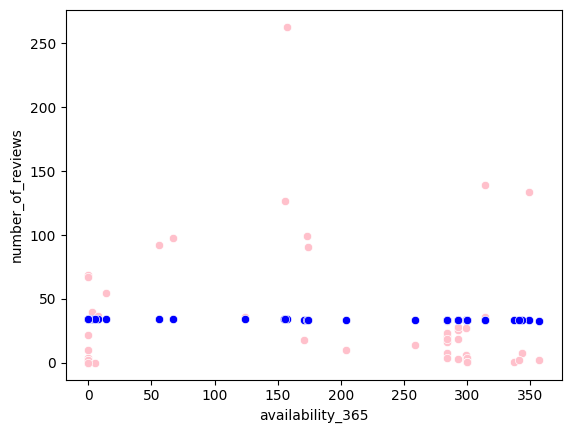

In [139]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='availability_365', y='number_of_reviews', color="pink", data=hotel)
sns.scatterplot(x='availability_365', y='Predicciones5', color="blue", data=hotel)

In [140]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.0001230016839102177
Coeficiente de correlación:  0.01109061242268513


##**“reviews_per_month vs review_scores_communication”**

<Axes: xlabel='reviews_per_month', ylabel='review_scores_communication'>

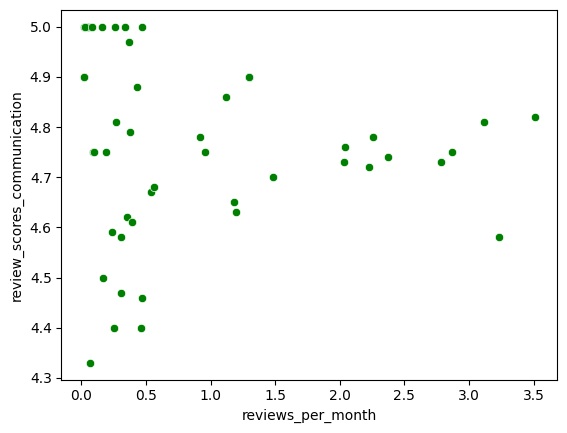

In [141]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='reviews_per_month', y='review_scores_communication',color="green",data=hotel)

In [142]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= hotel[['reviews_per_month']]
Var_Dep= hotel['review_scores_communication']

In [143]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [144]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [145]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [146]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['reviews_per_month'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.01902253]),
 'rank_': 1,
 'singular_': array([7.01121121]),
 'intercept_': 4.789922840761307}

modelo matemático: y= 0.01902253x + 4.789922840761307

In [147]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.010499819984044145

In [148]:
#Predecimos los valores de total 
y_pred= model.predict(X=hotel[['reviews_per_month']])
y_pred

array([4.72315374, 4.73704019, 4.7828845 , 4.78535743, 4.78668901,
       4.78878149, 4.77965067, 4.78326495, 4.78402586, 4.78174315,
       4.78250405, 4.78098225, 4.78478676, 4.78821081, 4.78402586,
       4.7686176 , 4.76747625, 4.78916194, 4.76519355, 4.78954239,
       4.78954239, 4.76519355, 4.78098225, 4.78859126, 4.74483943,
       4.78802059, 4.78497698, 4.78345518, 4.78954239, 4.76176949,
       4.78687924, 4.75111687, 4.74693191, 4.77166121, 4.77927022,
       4.73057253, 4.78630856, 4.77242211, 4.78516721, 4.74750259,
       4.7670958 , 4.72848005, 4.78269428, 4.7513071 , 4.73532817,
       4.78897171, 4.78897171, 4.78935216, 4.78840104, 4.76519355,
       4.76519355, 4.78117247])

In [149]:
#Insertamos la columna de predicciones en el DataFrame
hotel.insert(0, 'Predicciones6', y_pred)
hotel.head()

,Predicciones6,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones,Unnamed: 0,id,scrape_id,host_id,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
711,4.723154,34.014306,4.676547,35.087552,984.099280,93.450791,711,4631873.0,2.020000e+13,20850212,...,Hotel room,1 private bath,"[""Essentials"", ""Carbon monoxide alarm"", ""Build...",98.0,t,06/03/2023,22/11/2014,19/02/2023,FY 2017-18,t
787,4.737040,33.882511,4.678268,35.087552,984.099280,93.450791,787,6169292.0,2.020000e+13,20850212,...,Hotel room,1 private bath,"[""Security cameras on property"", ""Self check-i...",129.0,t,06/03/2023,25/05/2015,11/12/2022,FY 2017-18,t
938,4.782885,33.890499,4.671385,32.080611,892.546437,94.112558,938,6883183.0,2.020000e+13,23593310,...,Hotel room,1 private bath,"[""Self check-in"", ""Shampoo"", ""Air conditioning...",250.0,t,06/03/2023,05/09/2015,01/08/2021,License not needed per OSTR,f
1704,4.785357,33.826598,4.719565,35.087552,984.099280,93.450791,1704,16001051.0,2.020000e+13,103884979,...,Hotel room,4 shared baths,"[""Paid parking garage off premises"", ""Security...",91.0,t,06/03/2023,10/02/2017,20/02/2023,Exempt,f
2229,4.786689,33.375299,4.682140,35.087552,984.099280,93.450791,2229,23271377.0,2.020000e+13,173206762,...,Hotel room,1 private bath,"[""Security cameras on property"", ""Shampoo"", ""T...",119.0,t,06/03/2023,22/05/2019,04/09/2022,1083521,t


<Axes: xlabel='reviews_per_month', ylabel='review_scores_communication'>

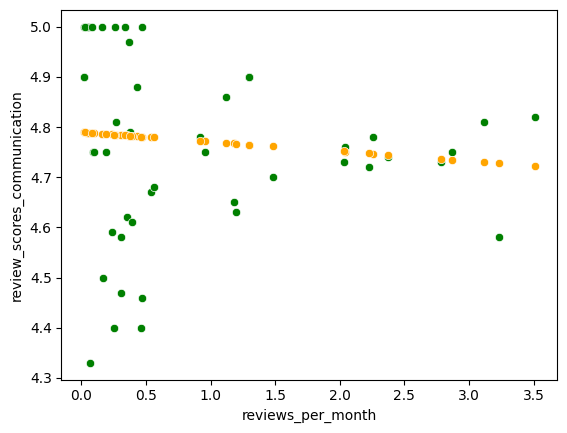

In [150]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='reviews_per_month', y='review_scores_communication', color="green", data=hotel)
sns.scatterplot(x='reviews_per_month', y='Predicciones6', color="orange", data=hotel)

In [151]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.010499819984044145
Coeficiente de correlación:  0.10246862926790884


In [152]:
#Graficamos todas las dispersiones entre todas las variables
#sns.pairplot(enthome_apt)

In [153]:
#Encontramos todas las correlaciones entre las variables 
Corr_Factors1_1=hotel.corr()
Corr_Factors1_1

<ipython-input-153-18fd7c093f81>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr_Factors1_1=hotel.corr()


,Predicciones6,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones,Unnamed: 0,id,scrape_id,host_id,...,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_rate,host_acceptance_rate,price
Predicciones6,1.000000,-0.121595,-0.358520,0.009631,0.009631,-0.009631,0.066752,0.068872,NaN,0.300031,...,0.358520,-0.056696,0.214404,NaN,-0.485645,-0.133461,-1.000000,-0.352099,0.009631,0.181071
Predicciones5,-0.121595,1.000000,0.280891,-0.253553,-0.253553,0.253553,0.203669,0.209622,NaN,0.057481,...,-0.280891,0.047027,-0.399056,NaN,0.128020,-0.108192,0.121595,0.393413,-0.253553,-0.236890
Predicciones4,-0.358520,0.280891,1.000000,0.104215,0.104215,-0.104215,0.154515,0.171625,NaN,-0.018837,...,-1.000000,0.000425,-0.242508,NaN,0.198384,-0.011946,0.358520,0.202193,0.104215,-0.235376
Predicciones3,0.009631,-0.253553,0.104215,1.000000,1.000000,-1.000000,-0.293185,-0.265732,NaN,-0.194605,...,-0.104215,-0.129124,0.150476,NaN,0.084090,0.040359,-0.009631,-0.148813,1.000000,0.063876
Predicciones2,0.009631,-0.253553,0.104215,1.000000,1.000000,-1.000000,-0.293185,-0.265732,NaN,-0.194605,...,-0.104215,-0.129124,0.150476,NaN,0.084090,0.040359,-0.009631,-0.148813,1.000000,0.063876
Predicciones,-0.009631,0.253553,-0.104215,-1.000000,-1.000000,1.000000,0.293185,0.265732,NaN,0.194605,...,0.104215,0.129124,-0.150476,NaN,-0.084090,-0.040359,0.009631,0.148813,-1.000000,-0.063876
Unnamed: 0,0.066752,0.203669,0.154515,-0.293185,-0.293185,0.293185,1.000000,0.995701,NaN,0.538318,...,-0.154515,0.072023,-0.493646,NaN,-0.414161,0.127079,-0.066752,0.349961,-0.293185,-0.232423
id,0.068872,0.209622,0.171625,-0.265732,-0.265732,0.265732,0.995701,1.000000,NaN,0.538164,...,-0.171625,0.075746,-0.507856,NaN,-0.432321,0.132807,-0.068872,0.347853,-0.265732,-0.232418
scrape_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,0.300031,0.057481,-0.018837,-0.194605,-0.194605,0.194605,0.538318,0.538164,NaN,1.000000,...,0.018837,-0.117346,-0.157615,NaN,-0.499740,-0.227304,-0.300031,-0.099789,-0.194605,-0.053154


In [154]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors11= abs(Corr_Factors1_1)
Corr_Factors11

,Predicciones6,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones,Unnamed: 0,id,scrape_id,host_id,...,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_rate,host_acceptance_rate,price
Predicciones6,1.000000,0.121595,0.358520,0.009631,0.009631,0.009631,0.066752,0.068872,NaN,0.300031,...,0.358520,0.056696,0.214404,NaN,0.485645,0.133461,1.000000,0.352099,0.009631,0.181071
Predicciones5,0.121595,1.000000,0.280891,0.253553,0.253553,0.253553,0.203669,0.209622,NaN,0.057481,...,0.280891,0.047027,0.399056,NaN,0.128020,0.108192,0.121595,0.393413,0.253553,0.236890
Predicciones4,0.358520,0.280891,1.000000,0.104215,0.104215,0.104215,0.154515,0.171625,NaN,0.018837,...,1.000000,0.000425,0.242508,NaN,0.198384,0.011946,0.358520,0.202193,0.104215,0.235376
Predicciones3,0.009631,0.253553,0.104215,1.000000,1.000000,1.000000,0.293185,0.265732,NaN,0.194605,...,0.104215,0.129124,0.150476,NaN,0.084090,0.040359,0.009631,0.148813,1.000000,0.063876
Predicciones2,0.009631,0.253553,0.104215,1.000000,1.000000,1.000000,0.293185,0.265732,NaN,0.194605,...,0.104215,0.129124,0.150476,NaN,0.084090,0.040359,0.009631,0.148813,1.000000,0.063876
Predicciones,0.009631,0.253553,0.104215,1.000000,1.000000,1.000000,0.293185,0.265732,NaN,0.194605,...,0.104215,0.129124,0.150476,NaN,0.084090,0.040359,0.009631,0.148813,1.000000,0.063876
Unnamed: 0,0.066752,0.203669,0.154515,0.293185,0.293185,0.293185,1.000000,0.995701,NaN,0.538318,...,0.154515,0.072023,0.493646,NaN,0.414161,0.127079,0.066752,0.349961,0.293185,0.232423
id,0.068872,0.209622,0.171625,0.265732,0.265732,0.265732,0.995701,1.000000,NaN,0.538164,...,0.171625,0.075746,0.507856,NaN,0.432321,0.132807,0.068872,0.347853,0.265732,0.232418
scrape_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,0.300031,0.057481,0.018837,0.194605,0.194605,0.194605,0.538318,0.538164,NaN,1.000000,...,0.018837,0.117346,0.157615,NaN,0.499740,0.227304,0.300031,0.099789,0.194605,0.053154


<Axes: >

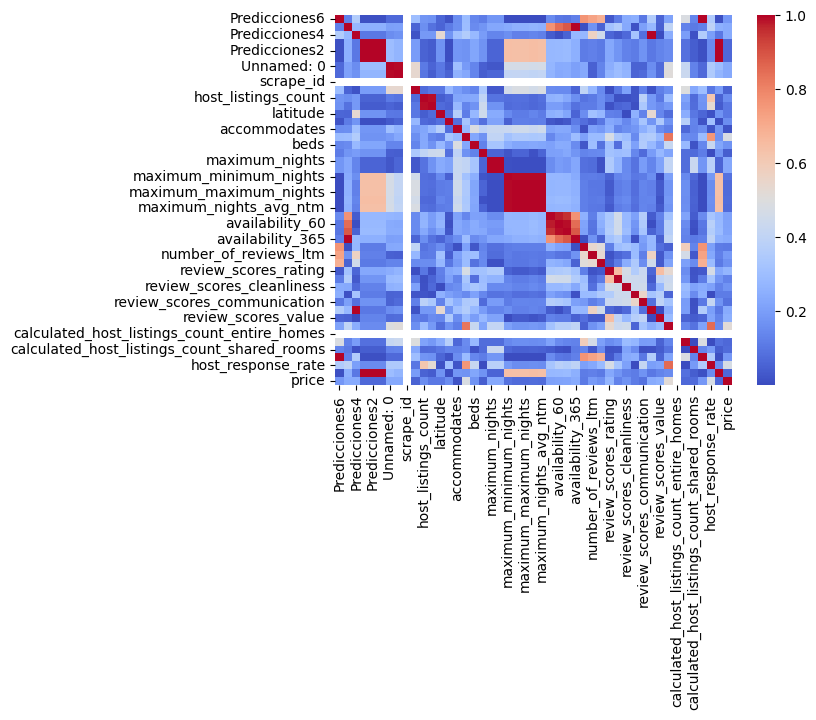

In [155]:
#Graficamos el mapa de calor de los coeficientes de correlación 
Heat_Map1= sns.heatmap(Corr_Factors11, cmap = 'coolwarm')  
Heat_Map1

<Axes: >

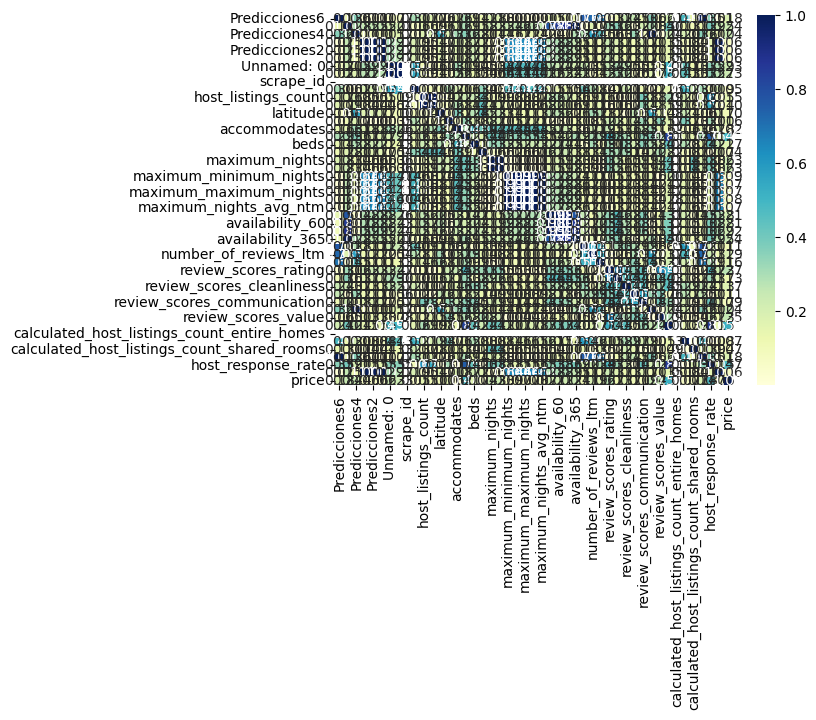

In [156]:
#Ajustamos el mapa de calor de los coeficientes de correlación 
Heat_Map2= sns.heatmap(Corr_Factors11, cmap = 'YlGnBu', annot=True, fmt=".2f")  
Heat_Map2